# **Malaria Detection**

##<b>Problem Definition</b>
**The context:** Why is this problem important to solve?<br>

Malaria is a world wide disease that can be lethal. In 2019 there were 229 million Malaria cases, and 400,000 deaths.  Malaria is passed by mosquitoes carrying the Plasmodium parasites.  The parasites may remain in the blood stream for a year without showing symptoms which creates an opportunity for detection.  However, detection is tedious and time-consuming, requiring inspection of microscopic images of red blood cell by an expert.  The accuracy depends on the individual and their expertise which can result in misdiagnosis.  Machine Learning can generate computer vision models that exceed the capabilities of humans.  There is an opportunity for machine learning to provide an accessible means of diagnosing Malaria with consistant accuracy world wide.

**The objectives:** What is the intended goal?<br>

The goal is to produce a computer vision model that meets or exceeds human accuracy in diagnosing Malaria.

**The key questions:** What are the key questions that need to be answered?<br>

Exploratory data analysis to determine if the data set is balanced, and what some characteristics of the images are?
The architecture of the CNN model needs to be determined?
Necessary methods of data augmentation, if any, to boost accuracy?
Is overfitting on training images going to be an issue?
If data regularization is required?
Conisder other means to limit overfitting, such as dropout?
Whether Transfer Learning is helpful in this scenario?

**The problem formulation:** What is it that we are trying to solve using data science?

We are trying to determine the feasibility of computer vision for diagnosing Malaria.  The approach will be to evaluate a number of convolutional neural networks using standard arcitectures and modeling to see if they have acceptable accuracy.  If the models prove to be useful we will recommend the best model to use in diagnosing Malaria.

## <b>Data Description </b>

There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>


**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>


###<b> Mount the Drive

In [1]:
# Mount Google drive to access the dataset
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


### <b>Loading libraries</b>

In [2]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs
from PIL import Image
import matplotlib.image as mpimg

# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU
                                                                                                 # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam, SGD                                                # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix
from sklearn.metrics import classification_report                                                # Importing the classification report

# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images


# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### <b>Let us load the data</b>

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same to your Google Drive. Then unzip the folder.

In [3]:
# Save the filepath
# Unzipping was performed in the folder on Google Drive
file='/content/drive/MyDrive/Colab Notebooks/Thurman Capstone Project/cell_images'

The extracted folder has different folders for train and test data will contain the different sizes of images for parasitized and uninfected cells within the respective folder name.

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model.

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [4]:
#Joining the base directory with the test folder
trainpath=os.path.join(file, 'train')

In [5]:
# Here we will be using a user defined function create_training_data() to extract the training images from the directory
training_data = []
CATEGORIES = ["parasitized", "uninfected"]

# Storing all the training images
def create_training_data():
    for category in CATEGORIES:                                                  # Looping over each category from the CATEGORIES list
        path = os.path.join(trainpath, category)
        class_num = category

        for img in os.listdir(path):
            img_array = load_img(os.path.join(path, img), target_size=(64,64))   # Reading the data and resizing the images to a smaller size for better handling

            new_array = img_to_array(img_array, data_format="channels_last")     # Converting the pictures to numerical arrays

            training_data.append([new_array, class_num])                         # Appending both the images and labels to a list of testing data

create_training_data()

In [6]:
# Creating two different lists to store the Numpy arrays and the corresponding labels
x_train = []
y_train = []

np.random.shuffle(training_data)                                               # Shuffling data to reduce variance and making sure that model remains general and overfit less
for features, label in training_data:                                          # Iterating over the training data which is generated from the create_training_data() function
    x_train.append(features)                                                   # Appending images into x_train
    y_train.append(label)                                                      # Appending labels into y_train

In [7]:
# Converting image data stored in lists to arrays
x_train=np.array(x_train)
y_train=np.array(y_train)

In [8]:
#Joining the base directory with the test folder
testpath=os.path.join(file, 'test')

In [9]:
# Here we will be using a user defined function create_testing_data() to extract the testing images from the directory
testing_data = []
CATEGORIES = ["parasitized", "uninfected"]

# Storing all the training images
def create_testing_data():
    for category in CATEGORIES:                                                  # Looping over each category from the CATEGORIES list
        path = os.path.join(testpath, category)
        class_num = category

        for img in os.listdir(path):
            img_array = load_img(os.path.join(path, img), target_size=(64,64))   # Reading the data and resizing the images to a smaller size for better handling

            new_array = img_to_array(img_array, data_format="channels_last")     # Converting the pictures to numerical arrays

            testing_data.append([new_array, class_num])                          # Appending both the images and labels to a list of testing data

create_testing_data()

In [10]:
# Creating two different lists to store the Numpy arrays and the corresponding labels
x_test = []
y_test = []

np.random.shuffle(testing_data)                                                # Shuffling data to reduce variance and making sure that model remains general and overfit less
for features, label in testing_data:                                           # Iterating over the testing data which is generated from the create_testing_data() function
    x_test.append(features)                                                    # Appending images into x_test
    y_test.append(label)                                                       # Appending labels into y_test

In [11]:
# Converting image data stored in lists to arrays
x_test=np.array(x_test)
y_test=np.array(y_test)

###<b> Check the shape of train and test images

In [ ]:
x_train.shape

(24958, 64, 64, 3)

In [ ]:
x_test.shape

(2600, 64, 64, 3)

The images were successfully resized to 64x64.  The reduction in size will allow faster training of the CNN models.  The images have 3 channels red, green, and blue.  All 24958 training images and 2600 test images were extracted from the folders.

###<b> Check the shape of train and test labels

In [ ]:
y_train.shape

(24958,)

In [ ]:
y_test.shape

(2600,)

####<b> Observations and insights: The number of lables in the test and train sets match the number of images in the test and train images and in the folders. All of the labels were identified successfully, which is required to train the models._____


### <b>Check the minimum and maximum range of pixel values for train and test images

In [ ]:
#Checking min and max pixel values for training images
print('Max pixel value: ',x_train.max())
print('Min pixel value: ',x_train.min())

Max pixel value:  255.0
Min pixel value:  0.0


In [ ]:
#Checking min and max pixel values for testing images
print('Max pixel value: ',x_test.max())
print('Min pixel value: ',x_test.min())

Max pixel value:  255.0
Min pixel value:  0.0


####<b> Observations and insights: **The training data and testing data have the same range of pixel values.  The min pixel value is 0, and the max is 255. This means the data will need to be normalized prior to feeding to CNN._____**



###<b> Count the number of values in both uninfected and parasitized

In [ ]:
pd.DataFrame(y_train).value_counts()

parasitized    12582
uninfected     12376
dtype: int64

In [ ]:
pd.DataFrame(y_test).value_counts()

parasitized    1300
uninfected     1300
dtype: int64

There are slightly fewer training unifected images, 12376 verses 12582 images with the parasite.  The testing data is balanced with 1300 of each.  Further discussion is below the countplot.

###<b>Normalize the images

In [12]:
#Normalize the training images.
x_train_normalized=x_train/255

In [13]:
#Normalize the testing images.
x_test_normalized=x_test/255

####<b> Observations and insights: The image arrays have been normalize to have a max value of 1.  The image array data is now ready to be inputed to CNNs.  It is important to input normalized data to CNNs to help avoid exploding gradients. _____

###<b> Plot to check if the data is balanced

(array([0, 1]), [Text(0, 0, 'parasitized'), Text(1, 0, 'uninfected')])

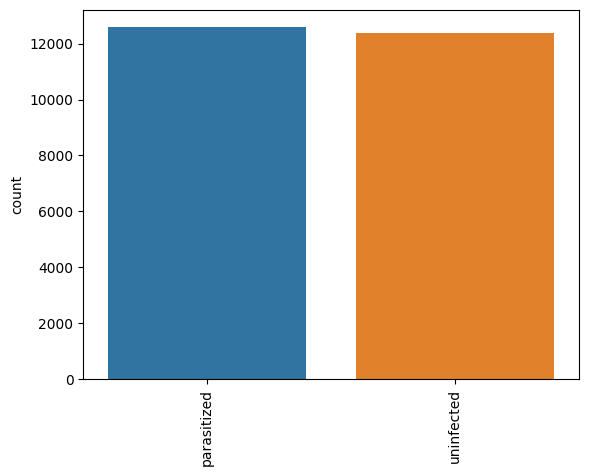

In [ ]:
sns.countplot(x=y_train);
plt.xticks(rotation = 'vertical')


####<b> Observations and insights: The data is roughly balanced between parasitized and uninfected images.  There are slightly fewer uninfected images, but not enough to skew the models.  If anything the model may classify more towards parasitized since it recieved more training.  This is a good thing, because patients infected with Malaria will be less likely to be misdiagnosed._____

### <b>Data Exploration</b>
Let's visualize the images from the training data

###<b> Visualize the images with subplot(6, 6) and figsize = (12, 12)

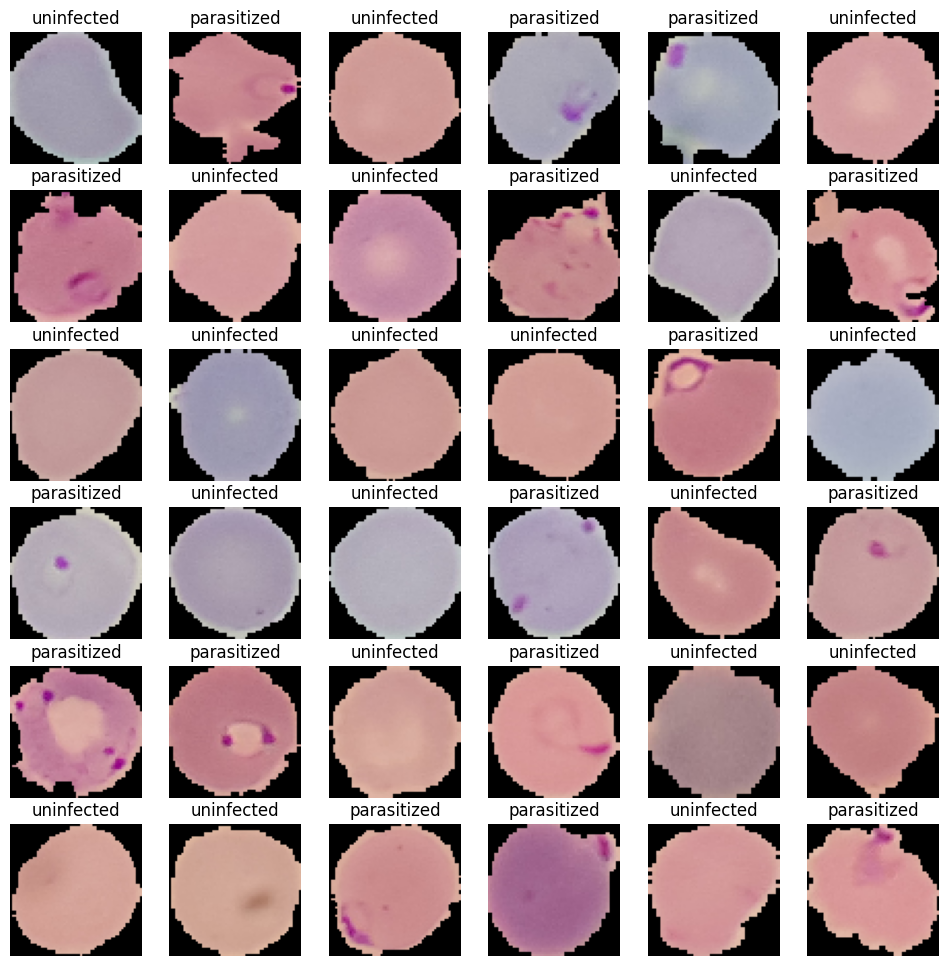

In [ ]:
plt.figure(figsize = (12, 12))

for i in range(1, 37, 1):
    plt.subplot(6, 6, i)
    plt.imshow(x_train_normalized[i])
    plt.axis('Off')
    if y_train[i] == 'parasitized':
      plt.title('parasitized')
    else:
      plt.title('uninfected')
plt.show()

####<b>Observations and insights:  The cells that are parasitized have dark purple dots or lines.  The color of the cell can range from pink to light blue and is not an indication of infection.  The shape of the cells also vary, with not all being circular.  This means the models will need to learn which features are important, namely that the cell contains dark purple dots or lines.

###<b> Plotting the mean images for parasitized and uninfected

In [ ]:
Parasitized_list=[]

for img in os.listdir(train_parasitized):
  img_array = load_img(os.path.join(train_parasitized, img), target_size = (64, 64))
  new_array = img_to_array(img_array, data_format="channels_last")
  new_array = np.array(new_array)
  Parasitized_list.append(new_array)


In [ ]:
mean_paras=np.mean(Parasitized_list,axis=0)

<b> Mean image for parasitized

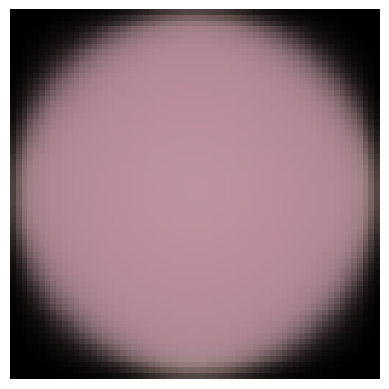

In [ ]:
#img = load_img(mean_paras, target_size = (64, 64))
plt.imshow(mean_paras/255)
plt.axis('off')
plt.show()

<b> Mean image for uninfected

In [ ]:
Uni_list=[]

for img in os.listdir(train_uninfected):
  img_array = load_img(os.path.join(train_uninfected, img), target_size = (64, 64))
  new_array = img_to_array(img_array, data_format="channels_last")
  new_array = np.array(new_array)
  Uni_list.append(new_array)

mean_uni=np.mean(Uni_list,axis=0)

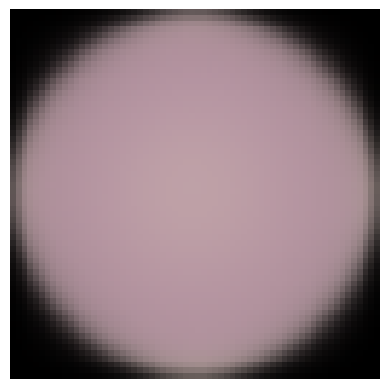

In [ ]:
plt.imshow(mean_uni/255)
plt.axis('off')
plt.show()

####<b> Observations and insights: Almost all features are lost with the averaging, including a sharp cell outline, and the presence of the purple dots indicating the presence of parasite.  However, the mean parasitized image has a slightly darker purple hue since the parasite may appear anywhere in the cell.It is important to though that the model doesn't just look for a purple cell because the cell color can vary as previously observed due to microscope lighting._____

### <b>Converting RGB to HSV of Images using OpenCV

In [ ]:
HSV=[]
def HSV_Converter(image):
  hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
  HSV.append(hsv_img)

###<b> Converting the train data

In [ ]:
for i in np.arange(0, 20):
  HSV_Converter(x_train[i])

In [ ]:
Train_HSV=HSV

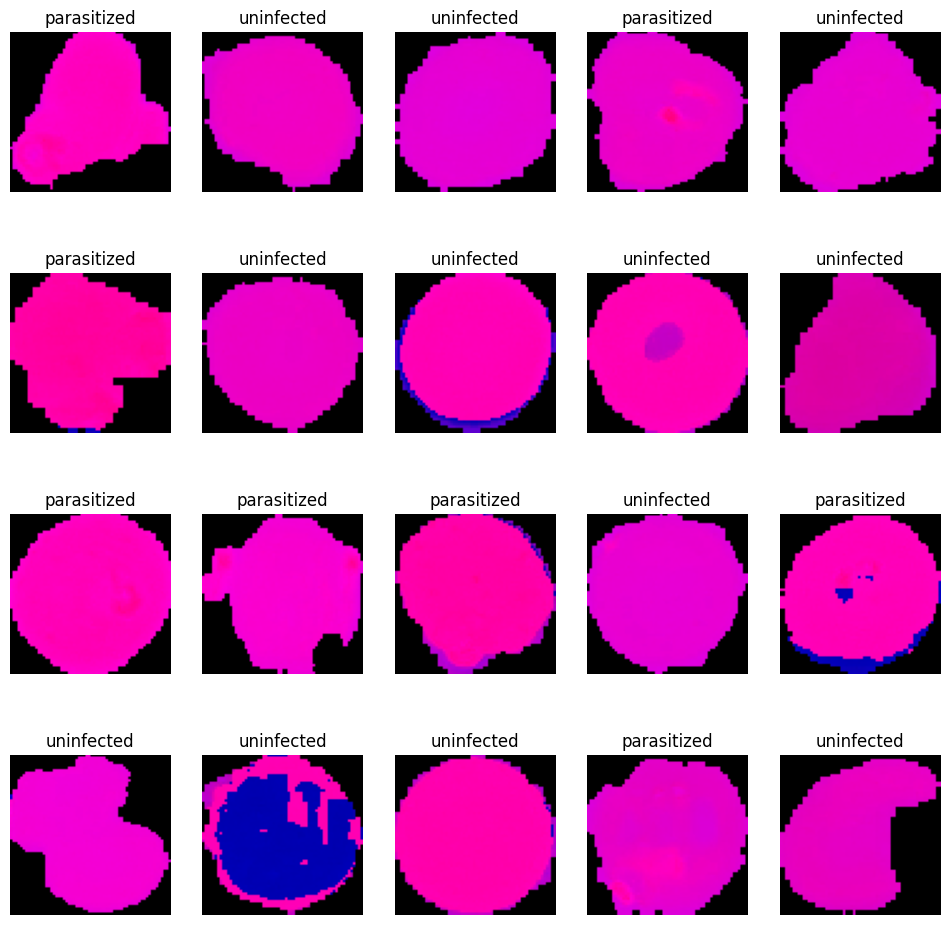

In [ ]:
plt.figure(figsize = (12, 12))

for i in range(1, 21, 1):
    plt.subplot(4, 5, i)
    plt.imshow((Train_HSV[i]/255))
    plt.axis('Off')
    if y_train[i-1] == 'parasitized':
      plt.title('parasitized')
    else:
      plt.title('uninfected')
plt.show()

###<b> Converting the test data

In [ ]:
HSV=[]
def HSV_Converter(image):
  hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
  HSV.append(hsv_img)

In [ ]:
for i in np.arange(0, 21):
  HSV_Converter(x_test[i])

In [ ]:
Test_HSV=HSV

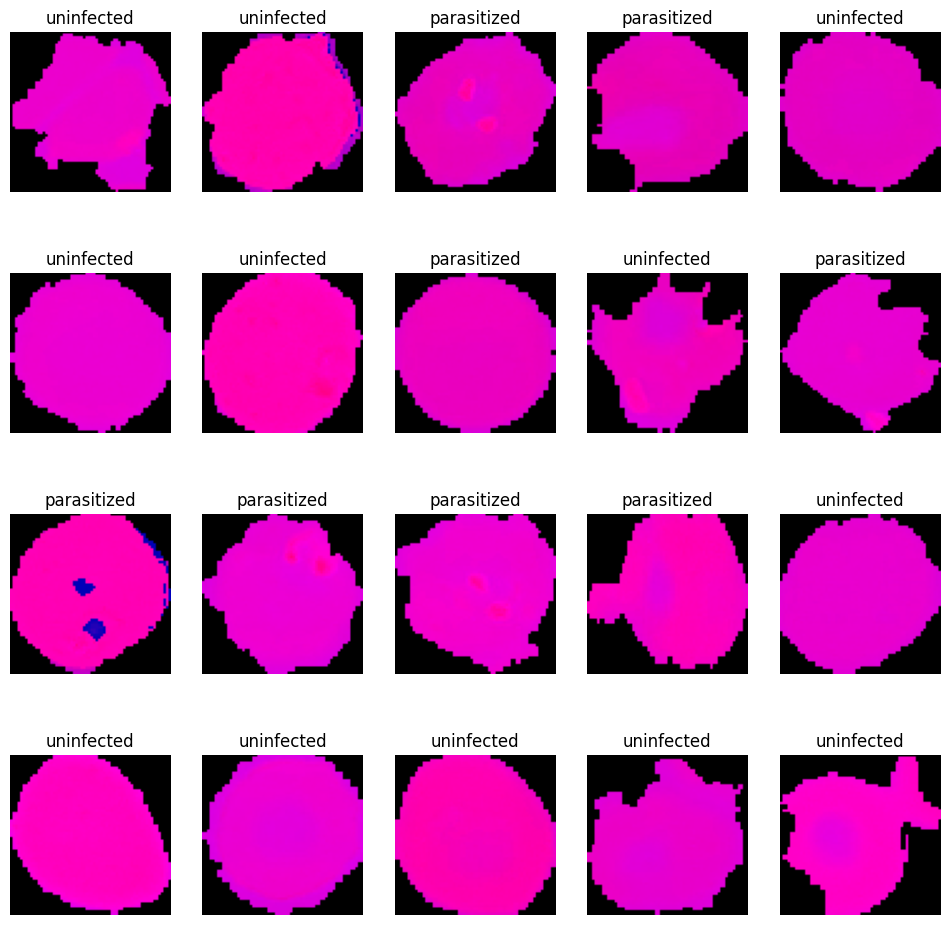

In [ ]:
plt.figure(figsize = (12, 12))

for i in range(1, 21, 1):
    plt.subplot(4, 5, i)
    plt.imshow((Test_HSV[i]/255))
    plt.axis('Off')
    if y_test[i-1] == 'parasitized':
      plt.title('parasitized')
    else:
      plt.title('uninfected')
plt.show()

####<b>Observations and insights: HSV image format can be a bit more like how humans see images.  It is useful in situations were color is very important. It can be important in variable lighting conditions as it seperates color from light intensity.  In my opinion I don't think it will be useful in this scenario because the lighting is controlled by the microscope.  Additionally, I percieve less differences between unifected and parasitized images, which may translate to the models have a harder time distinguishing the images.  The parasite appears as a lighter blotch and is hard to identify._____

###<b> Processing Images using Gaussian Blurring

###<b> Gaussian Blurring on train data

In [ ]:
Unblurred=[]
for i in range(5):
  Unblurred.append(x_train[i]/255)
for i in range(5):
  Unblurred.append(x_train[i]/255)

In [ ]:
Gaussian = []
for i in range(10):
  Gaussian.append(cv2.GaussianBlur(x_train[i], (3, 3), 0)/255)

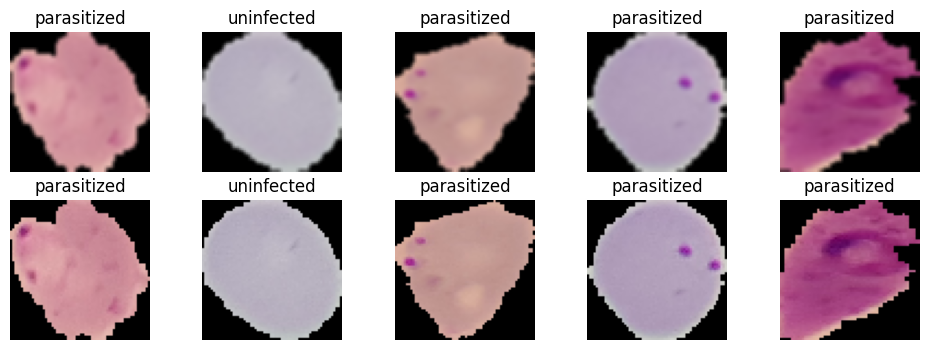

In [ ]:
plt.figure(figsize = (12, 4))

for i in range(1, 11, 1):
    plt.subplot(2, 5, i)
    plt.imshow(Unblurred[i-1])
    plt.axis('Off')
    if y_train[i-6] == 'parasitized':
      plt.title('parasitized')
    else:
      plt.title('uninfected')
for i in range(1, 6, 1):
    plt.subplot(2, 5, i)
    plt.imshow(Gaussian[i-1])
    plt.axis('Off')
    if y_train[i-1] == 'parasitized':
      plt.title('parasitized')
    else:
      plt.title('uninfected')
plt.show()

###<b> Gaussian Blurring on test data

In [ ]:
#Creating a list of unblurred images for comparison to Gaussian Blurring
Unblurred_test=[]
for i in range(5):
  Unblurred_test.append(x_test[i]/255)
for i in range(5):
  Unblurred_test.append(x_test[i]/255)

In [ ]:
#Creating a list of Gaussian Blurred images to visualize
Gaussian_test = []
for i in range(10):
  Gaussian_test.append(cv2.GaussianBlur(x_test[i], (3, 3), 0)/255)

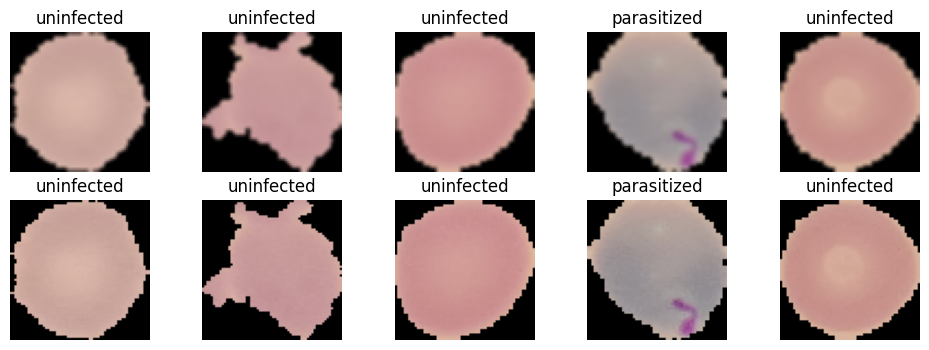

In [ ]:
# Plotting Gaussian blurred images on top and unblurred images on bottom for comparison

plt.figure(figsize = (12, 4))

for i in range(1, 11, 1):
    plt.subplot(2, 5, i)
    plt.imshow(Unblurred_test[i-1])
    plt.axis('Off')
    if y_test[i-6] == 'parasitized':
      plt.title('parasitized')
    else:
      plt.title('uninfected')
for i in range(1, 6, 1):
    plt.subplot(2, 5, i)
    plt.imshow(Gaussian_test[i-1])
    plt.axis('Off')
    if y_test[i-1] == 'parasitized':
      plt.title('parasitized')
    else:
      plt.title('uninfected')
plt.show()

####**Observations and insights: _Gaussian blurring can help when training CNNs because it can reduce noise at the pixel level and teach the CNN to focus on structures. There may be negligible details that are removed by Gaussian blur and it may smooth edges. For this application in may be helpful because it blurs the cell outline which is not an indication of infection.  However, it also blurs the parasite so if applied it would be important not to over-blur.  There are some microscope images where the parasite is already blurry and in those cases the Gaussian blurring would not help.____**

**Think About It:** Would blurring help us for this problem statement in any way? What else can we try?

**Other useful data augmentation techniques include rotating or flipping the images, because the cell orientation does not matter and the parasite can be located anywhere in the cell.  Additionally, it might be worthwhile to adjust the brightness of the images since the microscopes were used with different lighting intesities.**

## **Model Building**

### **Base Model**

**Note:** The Base Model has been fully built and evaluated with all outputs shown to give an idea about the process of the creation and evaluation of the performance of a CNN architecture. A similar process can be followed in iterating to build better-performing CNN architectures.

###<b> Importing the required libraries for building and training our Model

In [14]:
# Fixing the seed for random number generators
import random

np.random.seed(42)

random.seed(42)

tf.random.set_seed(42)

####<B>One Hot Encoding the train and test labels

In [15]:
# Convert labels from names to one hot vectors using LabelBinarizer.

from sklearn.preprocessing import LabelBinarizer

enc = LabelBinarizer()

y_train_encoded = enc.fit_transform(y_train)

y_test_encoded = enc.transform(y_test)

###<b> Building the model

In [ ]:
# Initialized a sequential model
model = Sequential()

# Adding the first convolutional layer with 16 filters and the kernel size of 3x3, and 'same' padding

# The input_shape denotes input dimension of images
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu', padding = "same", input_shape = (64, 64, 3)))

# Adding the second convolutional layer with 32 filters and the kernel size of 3x3
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same'))

# Adding max pooling to reduce the size of the output of second convolutional layer
model.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the 3-d output of the convolutional layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 256 neurons
model.add(Dense(256, activation = 'relu'))

# Adding the output layer with 1 neuron and 'sigmoid' activation function (for a binary classification problem)
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 64, 64, 16)        448       
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               8388864   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                      

###<b> Compiling the model

In [ ]:
model.compile(

    loss = 'binary_crossentropy',

    optimizer = 'adam',

    metrics=['accuracy']
)

<b> Using Callbacks

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping  # Regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint

# The following lines of code save the best model parameters if training accuracy goes down on further training
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 3)
mc = ModelCheckpoint('best_model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

<b> Fit and train our Model

In [ ]:
history = model.fit(

            x_train_normalized, y_train_encoded,

            epochs = 20,

            validation_split = 0.2,

            shuffle = True,

            verbose = 2,

            callbacks = [es, mc]
)

Epoch 1/20

Epoch 1: val_accuracy improved from -inf to 0.86919, saving model to best_model.h5
624/624 - 5s - loss: 0.5747 - accuracy: 0.7013 - val_loss: 0.3165 - val_accuracy: 0.8692 - 5s/epoch - 8ms/step
Epoch 2/20

Epoch 2: val_accuracy improved from 0.86919 to 0.92748, saving model to best_model.h5
624/624 - 3s - loss: 0.2267 - accuracy: 0.9137 - val_loss: 0.1740 - val_accuracy: 0.9275 - 3s/epoch - 4ms/step
Epoch 3/20

Epoch 3: val_accuracy improved from 0.92748 to 0.94371, saving model to best_model.h5
624/624 - 3s - loss: 0.1487 - accuracy: 0.9433 - val_loss: 0.1530 - val_accuracy: 0.9437 - 3s/epoch - 4ms/step
Epoch 4/20

Epoch 4: val_accuracy improved from 0.94371 to 0.94872, saving model to best_model.h5
624/624 - 3s - loss: 0.1107 - accuracy: 0.9604 - val_loss: 0.1437 - val_accuracy: 0.9487 - 3s/epoch - 4ms/step
Epoch 5/20

Epoch 5: val_accuracy improved from 0.94872 to 0.95733, saving model to best_model.h5
624/624 - 3s - loss: 0.0867 - accuracy: 0.9681 - val_loss: 0.1260 - v

###<b> Evaluating the model on test data

In [ ]:
# Making predictions on the test data
y_pred_test = model.predict(x_test_normalized)

82/82 [==============================] - 0s 2ms/step


In [ ]:
#Converting the predictions to integers, that can be used to check the model against the correct labels for accuracy.
final_results=[]
for i in y_pred_test:
  np.array(final_results.append(np.round(i,0)))

<b> Plotting the confusion matrix

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1300
           1       0.95      0.96      0.96      1300

    accuracy                           0.96      2600
   macro avg       0.96      0.96      0.96      2600
weighted avg       0.96      0.96      0.96      2600



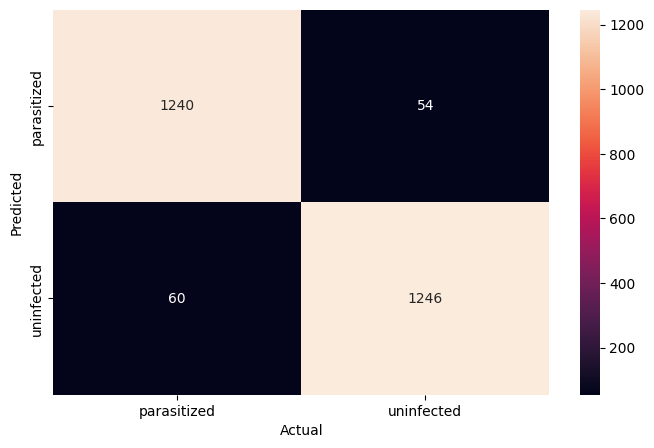

In [ ]:
# Printing the classification report
print(classification_report(y_test_encoded, final_results))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(final_results, y_test_encoded)
CATEGORIES = ["parasitized", "uninfected"]

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = CATEGORIES, yticklabels = CATEGORIES)

plt.ylabel('Predicted')

plt.xlabel('Actual')

# Display the plot
plt.show()

<b>Plotting the train and validation curves

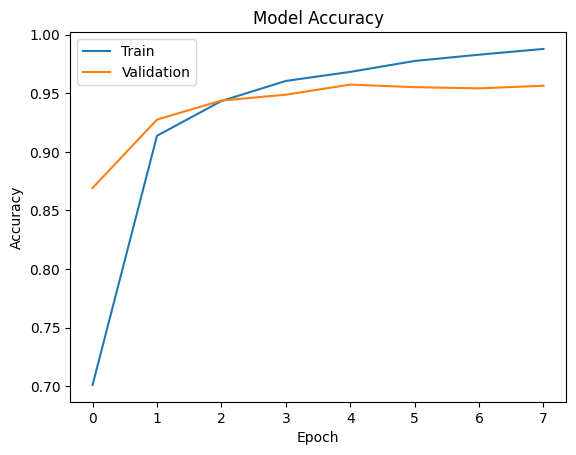

In [ ]:
plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

The model demonstrated slight overfitting after the second epoch.

So now let's try to build another model with few more add on layers and try to check if we can try to improve the model. Therefore try to build a model by adding few layers if required and altering the activation functions.

###<b> Model 1
####<b> Trying to improve the performance of our model by adding new layers


In [53]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
import random

np.random.seed(42)

random.seed(42)

tf.random.set_seed(42)

###<b> Building the Model

In [ ]:
# Initialized a sequential model
model1 = Sequential()

# Adding the first convolutional layer with 64 filters and the kernel size of 3x3, and 'same' padding

# The input_shape denotes input dimension of images
model1.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = "same", input_shape = (64, 64, 3)))

# Adding the second convolutional layer with 32 filters and the kernel size of 3x3
model1.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same'))

# Adding max pooling to reduce the size of the output of second convolutional layer
model1.add(MaxPooling2D(pool_size = (2, 2)))

# Adding the third convolutional layer with 32 filters and the kernel size of 3x3
model1.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same'))

# Adding max pooling to reduce the size of the output of third convolutional layer
model1.add(MaxPooling2D(pool_size = (2, 2)))

# Adding the fourth convolutional layer with 16 filters and the kernel size of 3x3
model1.add(Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu', padding = 'same'))

# Flattening the 3-d output of the convolutional layer to make it ready for creating dense connections
model1.add(Flatten())

# Adding a fully connected dense layer with 256 neurons
model1.add(Dense(256, activation = 'relu'))

# Adding the output layer with 1 neuron and 'sigmoid' activation function (for a binary classification problem)
model1.add(Dense(1, activation = 'sigmoid'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 16)        4

###<b> Compiling the model

In [ ]:
model1.compile(

    loss = 'binary_crossentropy',

    # Using Adam optimizer with 0.005 learning rate, by default it is 0.001
    optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.005),

    metrics=['accuracy']
)

<b> Using Callbacks

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping  # Regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint

# The following lines of code save the best model parameters if training accuracy goes down on further training
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('best_model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

<b>Fit and Train the model

In [ ]:
history1 = model1.fit(

            x_train_normalized, y_train_encoded,

            epochs = 20,

            validation_split = 0.2,

            shuffle = True,

            verbose = 2,

            callbacks = [es, mc]
)

Epoch 1/20

Epoch 1: val_accuracy improved from -inf to 0.96735, saving model to best_model.h5
624/624 - 602s - loss: 0.4911 - accuracy: 0.7173 - val_loss: 0.1033 - val_accuracy: 0.9673 - 602s/epoch - 965ms/step
Epoch 2/20

Epoch 2: val_accuracy did not improve from 0.96735
624/624 - 564s - loss: 0.0884 - accuracy: 0.9714 - val_loss: 0.1556 - val_accuracy: 0.9537 - 564s/epoch - 904ms/step
Epoch 3/20

Epoch 3: val_accuracy improved from 0.96735 to 0.97616, saving model to best_model.h5
624/624 - 576s - loss: 0.0712 - accuracy: 0.9774 - val_loss: 0.0749 - val_accuracy: 0.9762 - 576s/epoch - 924ms/step
Epoch 4/20

Epoch 4: val_accuracy improved from 0.97616 to 0.97716, saving model to best_model.h5
624/624 - 564s - loss: 0.0597 - accuracy: 0.9795 - val_loss: 0.0706 - val_accuracy: 0.9772 - 564s/epoch - 904ms/step
Epoch 5/20

Epoch 5: val_accuracy improved from 0.97716 to 0.98017, saving model to best_model.h5
624/624 - 579s - loss: 0.0602 - accuracy: 0.9794 - val_loss: 0.0590 - val_accura

###<b> Evaluating the model

In [ ]:
# Making predictions on the test data
y_pred_test = model1.predict(x_test_normalized)

82/82 [==============================] - 18s 225ms/step


In [ ]:
#Converting the predictions to integers, that can be used to check the model against the correct labels for accuracy.
final_results=[]
for i in y_pred_test:
  np.array(final_results.append(np.round(i,0)))

<b> Plotting the confusion matrix

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1300
           1       0.99      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.99      0.98      0.98      2600
weighted avg       0.99      0.98      0.98      2600



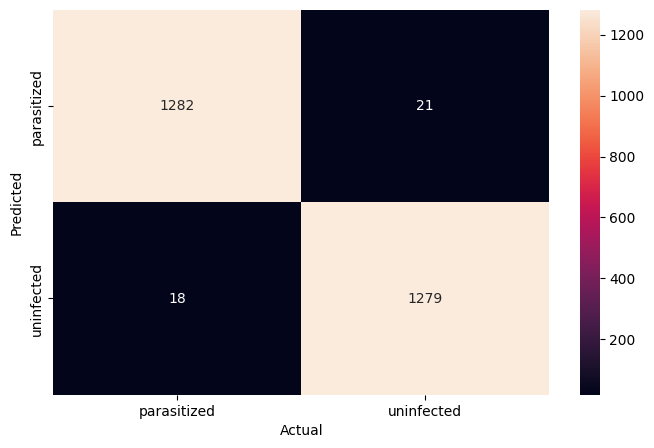

In [ ]:
# Printing the classification report
print(classification_report(y_test_encoded, final_results))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(final_results, y_test_encoded)
CATEGORIES = ["parasitized", "uninfected"]

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = CATEGORIES, yticklabels = CATEGORIES)

plt.ylabel('Predicted')

plt.xlabel('Actual')

# Display the plot
plt.show()

Adding two additional layers definitely helped improve accuracy.  The gains were achieved without overfitting.

<b> Plotting the train and the validation curves

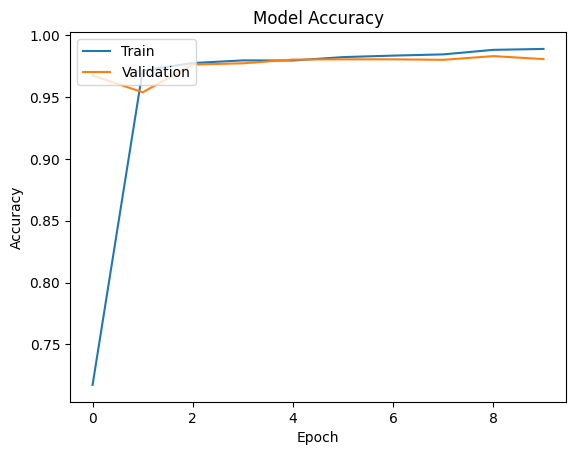

In [ ]:
plt.plot(history1.history['accuracy'])

plt.plot(history1.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

The model has very good generalization, the training and validation curves are really tight together.

In [ ]:
# Importing Keras utility to visualize the model
from tensorflow.keras import utils
import visualkeras
from PIL import ImageFont

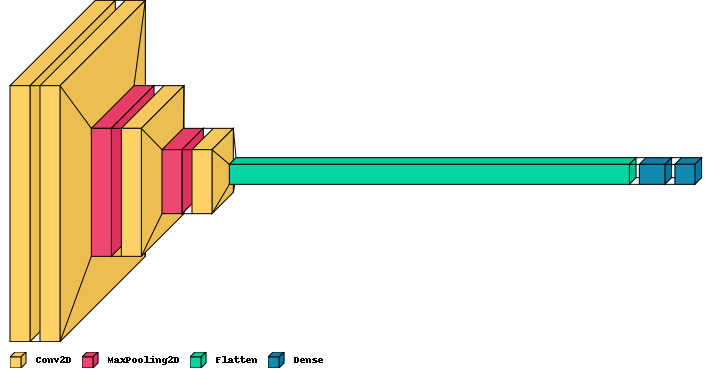

In [ ]:
# Running Keras utility to visualize the model and create a nice Figure for presenting
visualkeras.layered_view(model1, legend=True)

###<b>Think about it:</b><br>
Now let's build a model with LeakyRelu as the activation function  

*  Can the model performance be improved if we change our activation function to LeakyRelu?
*  Can BatchNormalization improve our model?

Let us try to build a model using BatchNormalization and using LeakyRelu as our activation function.

###<b> Model 2 with Batch Normalization

In [25]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
import random

np.random.seed(42)

random.seed(42)

tf.random.set_seed(42)

###<b> Building the Model

In [ ]:
# Initialized a sequential model
model2 = Sequential()

# Adding the first convolutional layer with 64 filters and the kernel size of 3x3, and 'same' padding

# The input_shape denotes input dimension of images
model2.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = "same", input_shape = (64, 64, 3)))

# Adding LeakyRelu activation function with a negative slope of 0.1
model2.add(LeakyReLU(0.1))

#Add Batch Normalization
model2.add(BatchNormalization())

# Adding the second convolutional layer with 32 filters and the kernel size of 3x3
model2.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))

# Adding LeakyRelu activation function with a negative slope of 0.1
model2.add(LeakyReLU(0.1))

# Adding max pooling to reduce the size of the output of second convolutional layer
model2.add(MaxPooling2D(pool_size = (2, 2)))

#Add Batch Normalization
model2.add(BatchNormalization())

# Adding the third convolutional layer with 32 filters and the kernel size of 3x3
model2.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))

# Adding LeakyRelu activation function with a negative slope of 0.1
model2.add(LeakyReLU(0.1))

# Adding max pooling to reduce the size of the output of third convolutional layer
model2.add(MaxPooling2D(pool_size = (2, 2)))

#Add Batch Normalization
model2.add(BatchNormalization())

# Adding the fourth convolutional layer with 16 filters and the kernel size of 3x3
model2.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = 'same'))

# Adding LeakyRelu activation function with a negative slope of 0.1
model2.add(LeakyReLU(0.1))

#Add Batch Normalization
model2.add(BatchNormalization())

# Flattening the 3-d output of the convolutional layer to make it ready for creating dense connections
model2.add(Flatten())

# Adding a fully connected dense layer with 256 neurons
model2.add(Dense(256))

# Adding LeakyRelu activation function with a negative slope of 0.1
model2.add(LeakyReLU(0.1))

# Adding the output layer with 1 neuron and 'sigmoid' activation function (for a binary classification problem)
model2.add(Dense(1, activation = 'sigmoid'))

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 64)        0         
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                      

###<b>Compiling the model

In [ ]:
model2.compile(

    loss = 'binary_crossentropy',

    optimizer = 'adam',

    metrics=['accuracy']
)

<b> Using callbacks

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping  # Regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint

# The following lines of code save the best model parameters if training accuracy goes down on further training
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('best_model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

<b>Fit and train the model

In [ ]:
history2 = model2.fit(

            x_train_normalized, y_train_encoded,

            epochs = 20,

            validation_split = 0.2,

            shuffle = True,

            verbose = 2,

            callbacks = [es, mc]
)

Epoch 1/20

Epoch 1: val_accuracy improved from -inf to 0.91146, saving model to best_model.h5
624/624 - 8s - loss: 0.3225 - accuracy: 0.8632 - val_loss: 0.2234 - val_accuracy: 0.9115 - 8s/epoch - 12ms/step
Epoch 2/20

Epoch 2: val_accuracy improved from 0.91146 to 0.95433, saving model to best_model.h5
624/624 - 4s - loss: 0.0990 - accuracy: 0.9680 - val_loss: 0.1494 - val_accuracy: 0.9543 - 4s/epoch - 6ms/step
Epoch 3/20

Epoch 3: val_accuracy did not improve from 0.95433
624/624 - 4s - loss: 0.0809 - accuracy: 0.9737 - val_loss: 0.3190 - val_accuracy: 0.9183 - 4s/epoch - 6ms/step
Epoch 4/20

Epoch 4: val_accuracy improved from 0.95433 to 0.97075, saving model to best_model.h5
624/624 - 4s - loss: 0.0624 - accuracy: 0.9795 - val_loss: 0.0934 - val_accuracy: 0.9708 - 4s/epoch - 6ms/step
Epoch 5/20

Epoch 5: val_accuracy did not improve from 0.97075
624/624 - 4s - loss: 0.0600 - accuracy: 0.9796 - val_loss: 0.1307 - val_accuracy: 0.9698 - 4s/epoch - 6ms/step
Epoch 6/20

Epoch 6: val_ac

<b>Plotting the train and validation accuracy

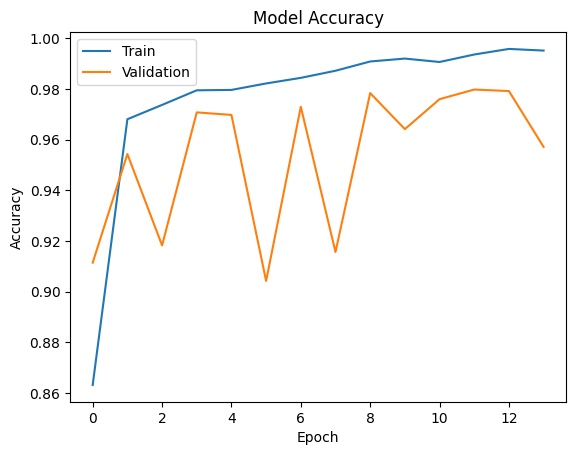

In [ ]:

plt.plot(history2.history['accuracy'])

plt.plot(history2.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

###<b>Evaluating the model

In [ ]:
# Making predictions on the test data
y_pred_test = model2.predict(x_test_normalized)

82/82 [==============================] - 0s 3ms/step


In [ ]:
#Converting the predictions to integers, that can be used to check the model against the correct labels for accuracy.
final_results=[]
for i in y_pred_test:
  np.array(final_results.append(np.round(i,0)))

####<b>Observations and insights: The validation plot for this model fluctuates greater than seen previously.  It is hard to identify why the validation plot shows greater variance than the training plot since two modifications were made both batch normalization and Leaky Relu as the activation function.  It could be worthwhile to test them idependantly to see if one is more helpful. ____

<b> Generate the classification report and confusion matrix

              precision    recall  f1-score   support

           0       0.99      0.94      0.97      1300
           1       0.95      0.99      0.97      1300

    accuracy                           0.97      2600
   macro avg       0.97      0.97      0.97      2600
weighted avg       0.97      0.97      0.97      2600



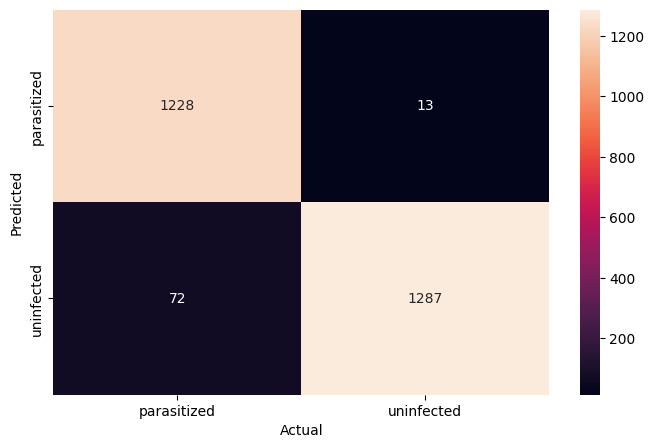

In [ ]:
# Printing the classification report
print(classification_report(y_test_encoded, final_results))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(final_results, y_test_encoded)
CATEGORIES = ["parasitized", "uninfected"]

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = CATEGORIES, yticklabels = CATEGORIES)

plt.ylabel('Predicted')

plt.xlabel('Actual')

# Display the plot
plt.show()

The recall for parasitized images decreased along with overall accuracy.  It is unclear whether Batch Normalization or Leaky ReLU had a greater impact.  Repeat this model still using Leaky ReLU but not Batch normalization to isolate factors.

### Repeating Model 2 without Batch Normalization and using Leaky ReLU.

In [54]:
# Initialized a sequential model
model2 = Sequential()

# Adding the first convolutional layer with 64 filters and the kernel size of 3x3, and 'same' padding

# The input_shape denotes input dimension of images
model2.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = "same", input_shape = (64, 64, 3)))

# Adding LeakyRelu activation function with a negative slope of 0.1
model2.add(LeakyReLU(0.1))

# Adding the second convolutional layer with 32 filters and the kernel size of 3x3
model2.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))

# Adding LeakyRelu activation function with a negative slope of 0.1
model2.add(LeakyReLU(0.1))

# Adding max pooling to reduce the size of the output of second convolutional layer
model2.add(MaxPooling2D(pool_size = (2, 2)))

# Adding the third convolutional layer with 32 filters and the kernel size of 3x3
model2.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))

# Adding LeakyRelu activation function with a negative slope of 0.1
model2.add(LeakyReLU(0.1))

# Adding max pooling to reduce the size of the output of third convolutional layer
model2.add(MaxPooling2D(pool_size = (2, 2)))

# Adding the fourth convolutional layer with 16 filters and the kernel size of 3x3
model2.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = 'same'))

# Adding LeakyRelu activation function with a negative slope of 0.1
model2.add(LeakyReLU(0.1))

# Flattening the 3-d output of the convolutional layer to make it ready for creating dense connections
model2.add(Flatten())

# Adding a fully connected dense layer with 256 neurons
model2.add(Dense(256))

# Adding LeakyRelu activation function with a negative slope of 0.1
model2.add(LeakyReLU(0.1))

# Adding the output layer with 1 neuron and 'sigmoid' activation function (for a binary classification problem)
model2.add(Dense(1, activation = 'sigmoid'))

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                        

In [55]:
model2.compile(

    loss = 'binary_crossentropy',

    optimizer = 'adam',

    metrics=['accuracy']
)

In [56]:
from tensorflow.keras.callbacks import EarlyStopping  # Regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint

# The following lines of code save the best model parameters if training accuracy goes down on further training
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('best_model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

In [57]:
history2 = model2.fit(

            x_train_normalized, y_train_encoded,

            epochs = 20,

            validation_split = 0.2,

            shuffle = True,

            verbose = 2,

            callbacks = [es, mc]
)

Epoch 1/20

Epoch 1: val_accuracy improved from -inf to 0.97135, saving model to best_model.h5
624/624 - 6s - loss: 0.2913 - accuracy: 0.8604 - val_loss: 0.0858 - val_accuracy: 0.9714 - 6s/epoch - 9ms/step
Epoch 2/20

Epoch 2: val_accuracy did not improve from 0.97135
624/624 - 3s - loss: 0.0764 - accuracy: 0.9754 - val_loss: 0.0970 - val_accuracy: 0.9643 - 3s/epoch - 5ms/step
Epoch 3/20

Epoch 3: val_accuracy improved from 0.97135 to 0.98157, saving model to best_model.h5
624/624 - 3s - loss: 0.0701 - accuracy: 0.9778 - val_loss: 0.0567 - val_accuracy: 0.9816 - 3s/epoch - 5ms/step
Epoch 4/20

Epoch 4: val_accuracy did not improve from 0.98157
624/624 - 3s - loss: 0.0584 - accuracy: 0.9810 - val_loss: 0.0629 - val_accuracy: 0.9796 - 3s/epoch - 5ms/step
Epoch 5/20

Epoch 5: val_accuracy improved from 0.98157 to 0.98217, saving model to best_model.h5
624/624 - 3s - loss: 0.0559 - accuracy: 0.9816 - val_loss: 0.0574 - val_accuracy: 0.9822 - 3s/epoch - 5ms/step
Epoch 6/20

Epoch 6: val_acc

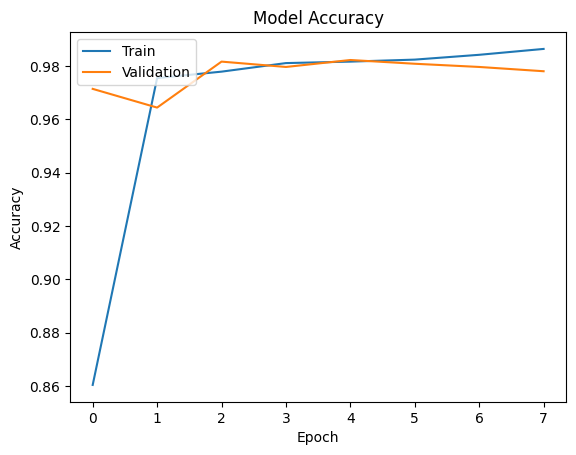

In [58]:

plt.plot(history2.history['accuracy'])

plt.plot(history2.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

Slight overfitting is observed in the model after Epoch 4.

In [59]:
# Making predictions on the test data
y_pred_test = model2.predict(x_test_normalized)

82/82 [==============================] - 0s 2ms/step


In [60]:
#Converting the predictions to integers, that can be used to check the model against the correct labels for accuracy.
final_results=[]
for i in y_pred_test:
  np.array(final_results.append(np.round(i,0)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1300
           1       0.99      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



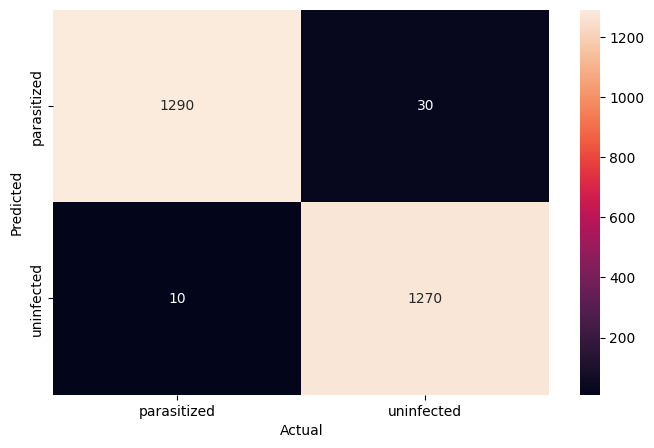

In [61]:
# Printing the classification report
print(classification_report(y_test_encoded, final_results))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(final_results, y_test_encoded)
CATEGORIES = ["parasitized", "uninfected"]

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = CATEGORIES, yticklabels = CATEGORIES)

plt.ylabel('Predicted')

plt.xlabel('Actual')

# Display the plot
plt.show()

Using Leaky ReLU as an activation function further improved model performance.  This experiment also demonstrated by isolation that is was Batch Normalization that negatively impacted performance in the model that combined Leaky ReLU and Batch Normalization.

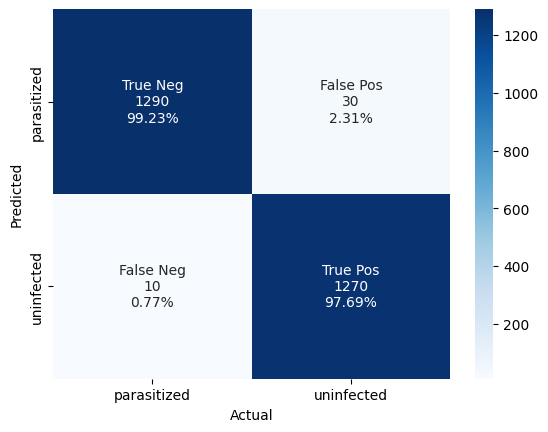

In [62]:
#Improving the confusion matrix with additional labeling to be used in presentation.

# Adding names to each box to describe the result, example False Positive.
group_names = ['True Neg','False Pos','False Neg','True Pos']
# Adding the counts of each box in the confusion matrix to a list
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
# Calculating the percent of each categorization in the confusion matrix.
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/1300]  #Dividing by 1300 since that is how many images are in each class in the test data
# Adding additional labels to the confusion matrix.
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', xticklabels = CATEGORIES, yticklabels = CATEGORIES)
plt.ylabel('Predicted')

plt.xlabel('Actual')

# Display the plot
plt.show()

Note: In the Confusion Matrix above generated for the presentation, True Positive and True Negative figure labels are switched.  It will be fixed in powerpoint.

In [29]:
# Installing Keras utility for visualizing the model
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 14.4 MB/s eta 0:00:00


In [30]:
from tensorflow.keras import utils
import visualkeras
from PIL import ImageFont

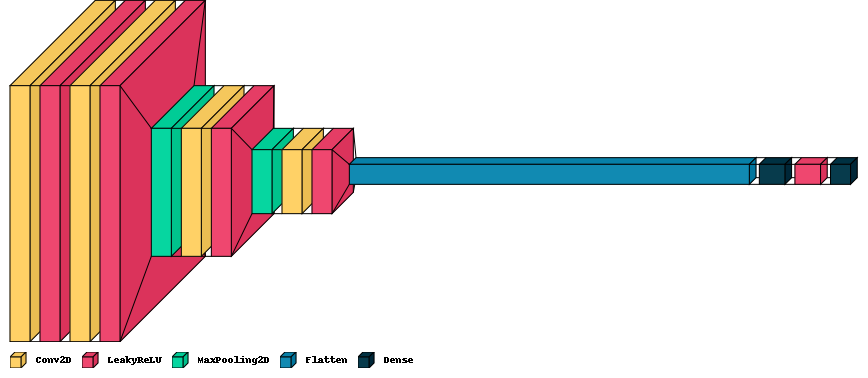

In [31]:
# Running Keras utility to visualize the model and create a nice Figure for presenting
visualkeras.layered_view(model2, legend=True)

Max pooling reduces the output size and makes the model smaller.

###<b>Model 3 with Data Augmentation

In [ ]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
import random

np.random.seed(42)

random.seed(42)

tf.random.set_seed(42)

###<b> Use image data generator

In [ ]:
# Convert labels from names to one hot vectors using LabelBinarizer.

from sklearn.preprocessing import LabelBinarizer

enc = LabelBinarizer()

y_train_encoded = enc.fit_transform(y_train)

y_test_encoded = enc.transform(y_test)


In [ ]:
X_Train, X_Val, Y_Train, Y_Val = train_test_split(x_train_normalized, y_train_encoded, test_size = 0.2, random_state = 42)

# All images were previously normalized by 1/255 so they don't need normalized again.
train_datagen = ImageDataGenerator(horizontal_flip = True,
                              vertical_flip = True,
                              zoom_range=0.1,
                              brightness_range=[0.7,1.3]
                                   )

# Flowing training images in batches of 40 using train_datagen generator
train_generator = train_datagen.flow(x = X_Train, y = Y_Train,
                                     shuffle=True,
                                     batch_size=40)

###**Think About It :**<br>

*  Check if the performance of the model can be improved by changing different parameters in the ImageDataGenerator.

**The augmentation techniques selected (flipping, zoom, and brightness) produced the best most realistic training images.  These conditions are likely to be experienced in the field, the light intensity of the microscope varies and the cells won't be in a particular orientation.**



####<B>Visualizing Augmented images

In [ ]:
# Create lists to contain the augemented images and their labels.
aug_labels=[]
aug_images=[]

for i in range(1):
    aug_batch_images, aug_batch_labels = train_generator[i]
    aug_labels.extend(aug_batch_labels.tolist())
    for j in range(37):
        aug_images.append(aug_batch_images[j])

# Now aug_labels contains the labels from the first 36 augmented images in order.
# And aug_images is a list of matrixes from augmented images.

x_aug=np.array(aug_images)
y_aug=np.array(aug_labels)

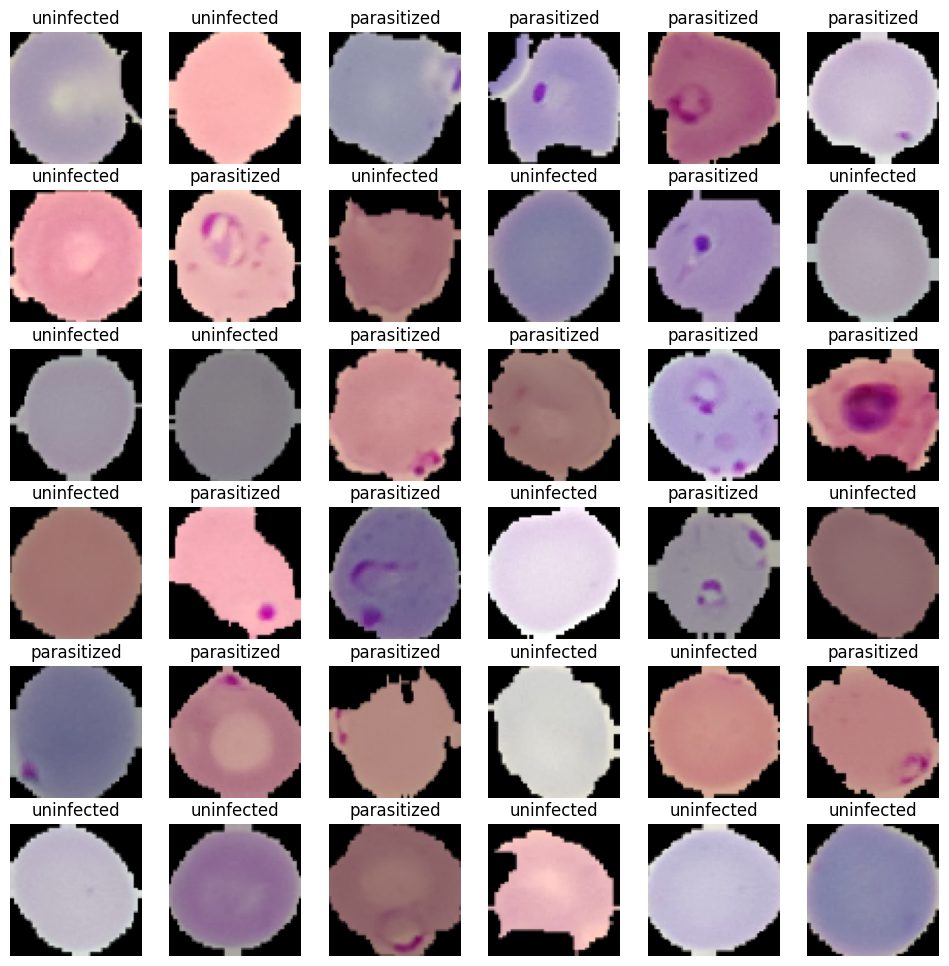

In [ ]:
# Plot 36 Augmented images so they may be visualized
plt.figure(figsize = (12, 12))

for i in range(1, 37, 1):
    plt.subplot(6, 6, i)
    plt.imshow(aug_images[i])
    plt.axis('Off')
    if y_aug[i] == 'parasitized':
      plt.title('parasitized')
    else:
      plt.title('uninfected')
plt.show()

####<b>Observations and insights: The augmented images look realistic.  They have been modified in meaninfull ways that artificially increase the size of the training dataset. They have not been distorted in a way that makes them unidentifiable.  The zoom augmentation added some 'legs' to the cells where it inputed data that wasn't there originally.  This is acceptable because cell shape isn't an idenifying feature of being infected.____

###<b>Building the Model

In [ ]:
# Initialized a sequential model
model3 = Sequential()

# Adding the first convolutional layer with 64 filters and the kernel size of 3x3, and 'same' padding

# The input_shape denotes input dimension of images
model3.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = "same", input_shape = (64, 64, 3)))

# Adding the second convolutional layer with 32 filters and the kernel size of 3x3
model3.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same'))

# Adding max pooling to reduce the size of the output of second convolutional layer
model3.add(MaxPooling2D(pool_size = (2, 2)))

# Adding the third convolutional layer with 32 filters and the kernel size of 3x3
model3.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same'))

# Adding max pooling to reduce the size of the output of third convolutional layer
model3.add(MaxPooling2D(pool_size = (2, 2)))

# Adding the fourth convolutional layer with 16 filters and the kernel size of 3x3
model3.add(Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu', padding = 'same'))

#Add Batch Normalization before outputting to Dense Neural Network
model3.add(BatchNormalization())

# Flattening the 3-d output of the convolutional layer to make it ready for creating dense connections
model3.add(Flatten())

# Adding a fully connected dense layer with 256 neurons
model3.add(Dense(256, activation = 'relu'))

# Adding the output layer with 1 neuron and 'sigmoid' activation function (for a binary classification problem)
model3.add(Dense(1, activation = 'sigmoid'))

model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 16)        4

In [ ]:
model3.compile(

    loss = 'binary_crossentropy',

    optimizer = 'adam',

    metrics=['accuracy']
)

<b>Using Callbacks

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping  # Regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint

# The following lines of code save the best model parameters if training accuracy goes down on further training
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('best_model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

<b> Fit and Train the model

In [ ]:

history3 = model3.fit(

            X_Train, Y_Train,

            epochs = 20,

            validation_data = (X_Val, Y_Val),

            shuffle = True,

            verbose = 2,

            callbacks = [es, mc]
)

Epoch 1/20

Epoch 1: val_accuracy improved from -inf to 0.89283, saving model to best_model.h5
624/624 - 16s - loss: 0.5200 - accuracy: 0.7269 - val_loss: 0.2827 - val_accuracy: 0.8928 - 16s/epoch - 26ms/step
Epoch 2/20

Epoch 2: val_accuracy improved from 0.89283 to 0.97095, saving model to best_model.h5
624/624 - 3s - loss: 0.0947 - accuracy: 0.9685 - val_loss: 0.0921 - val_accuracy: 0.9710 - 3s/epoch - 5ms/step
Epoch 3/20

Epoch 3: val_accuracy improved from 0.97095 to 0.97796, saving model to best_model.h5
624/624 - 3s - loss: 0.0755 - accuracy: 0.9756 - val_loss: 0.0717 - val_accuracy: 0.9780 - 3s/epoch - 5ms/step
Epoch 4/20

Epoch 4: val_accuracy did not improve from 0.97796
624/624 - 3s - loss: 0.0680 - accuracy: 0.9776 - val_loss: 0.0645 - val_accuracy: 0.9778 - 3s/epoch - 5ms/step
Epoch 5/20

Epoch 5: val_accuracy did not improve from 0.97796
624/624 - 3s - loss: 0.0596 - accuracy: 0.9806 - val_loss: 0.0952 - val_accuracy: 0.9696 - 3s/epoch - 5ms/step
Epoch 6/20

Epoch 6: val_

###<B>Evaluating the model

<b>Plot the train and validation accuracy

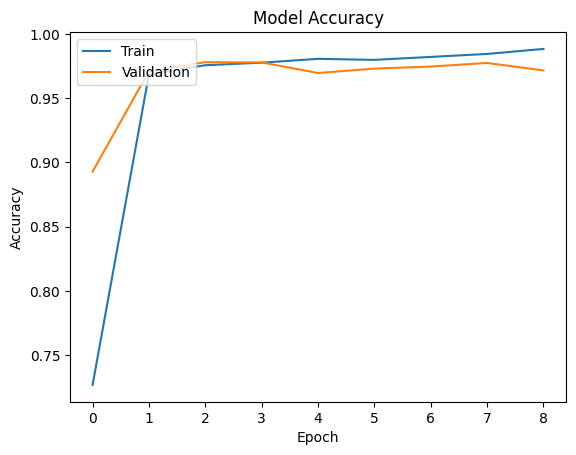

In [ ]:
plt.plot(history3.history['accuracy'])

plt.plot(history3.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

The model shows slight overfitting after Epoch 3.

<B>Plotting the classification report and confusion matrix

In [ ]:
# Making predictions on the test data
y_pred_test = model3.predict(x_test_normalized)

82/82 [==============================] - 0s 3ms/step


In [ ]:
#Converting the predictions to integers, that can be used to check the model against the correct labels for accuracy.
final_results=[]
for i in y_pred_test:
  np.array(final_results.append(np.round(i,0)))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1300
           1       0.95      0.99      0.97      1300

    accuracy                           0.97      2600
   macro avg       0.97      0.97      0.97      2600
weighted avg       0.97      0.97      0.97      2600



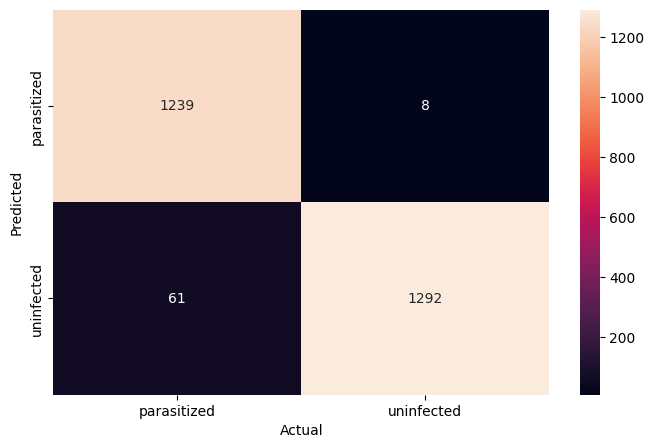

In [ ]:
# Printing the classification report
print(classification_report(y_test_encoded, final_results))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(final_results, y_test_encoded)
CATEGORIES = ["parasitized", "uninfected"]

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = CATEGORIES, yticklabels = CATEGORIES)

plt.ylabel('Predicted')

plt.xlabel('Actual')

# Display the plot
plt.show()

The recall for parasitized images and the overall accuracy decreased.  It was determined later that Batch Normalization decreased performance for Model 2.  Repeat the test with Augmented images but don't include Batch Normalization in the model.

 **Remake the Data Augmentation model removing Batch Normalization, since Batch Normalization was shown to reduce the performance in Model 2.**

In [ ]:
# Initialized a sequential model
model3 = Sequential()

# Adding the first convolutional layer with 64 filters and the kernel size of 3x3, and 'same' padding

# The input_shape denotes input dimension of images
model3.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = "same", input_shape = (64, 64, 3)))

# Adding LeakyRelu activation function with a negative slope of 0.1
model3.add(LeakyReLU(0.1))

# Adding the second convolutional layer with 32 filters and the kernel size of 3x3
model3.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))

# Adding LeakyRelu activation function with a negative slope of 0.1
model3.add(LeakyReLU(0.1))

# Adding max pooling to reduce the size of the output of second convolutional layer
model3.add(MaxPooling2D(pool_size = (2, 2)))

# Adding the third convolutional layer with 32 filters and the kernel size of 3x3
model3.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))

# Adding LeakyRelu activation function with a negative slope of 0.1
model3.add(LeakyReLU(0.1))

# Adding max pooling to reduce the size of the output of third convolutional layer
model3.add(MaxPooling2D(pool_size = (2, 2)))

# Adding the fourth convolutional layer with 16 filters and the kernel size of 3x3
model3.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = 'same'))

# Adding LeakyRelu activation function with a negative slope of 0.1
model3.add(LeakyReLU(0.1))

# Flattening the 3-d output of the convolutional layer to make it ready for creating dense connections
model3.add(Flatten())

# Adding a fully connected dense layer with 256 neurons
model3.add(Dense(256))

# Adding LeakyRelu activation function with a negative slope of 0.1
model3.add(LeakyReLU(0.1))

# Adding the output layer with 1 neuron and 'sigmoid' activation function (for a binary classification problem)
model3.add(Dense(1, activation = 'sigmoid'))

model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                        

In [ ]:
model3.compile(

    loss = 'binary_crossentropy',

    optimizer = 'adam',

    metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping  # Regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint

# The following lines of code save the best model parameters if training accuracy goes down on further training
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 10)
mc = ModelCheckpoint('best_model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

In [ ]:

history3 = model3.fit(

            X_Train, Y_Train,

            epochs = 20,

            validation_data = (X_Val, Y_Val),

            shuffle = True,

            verbose = 2,

            callbacks = [es, mc]
)

Epoch 1/20

Epoch 1: val_accuracy improved from -inf to 0.97015, saving model to best_model.h5
624/624 - 6s - loss: 0.2774 - accuracy: 0.8626 - val_loss: 0.0878 - val_accuracy: 0.9702 - 6s/epoch - 9ms/step
Epoch 2/20

Epoch 2: val_accuracy improved from 0.97015 to 0.97696, saving model to best_model.h5
624/624 - 3s - loss: 0.0740 - accuracy: 0.9759 - val_loss: 0.0770 - val_accuracy: 0.9770 - 3s/epoch - 5ms/step
Epoch 3/20

Epoch 3: val_accuracy did not improve from 0.97696
624/624 - 3s - loss: 0.0648 - accuracy: 0.9800 - val_loss: 0.0786 - val_accuracy: 0.9752 - 3s/epoch - 5ms/step
Epoch 4/20

Epoch 4: val_accuracy did not improve from 0.97696
624/624 - 3s - loss: 0.0561 - accuracy: 0.9808 - val_loss: 0.0815 - val_accuracy: 0.9730 - 3s/epoch - 5ms/step
Epoch 5/20

Epoch 5: val_accuracy did not improve from 0.97696
624/624 - 3s - loss: 0.0513 - accuracy: 0.9816 - val_loss: 0.0798 - val_accuracy: 0.9754 - 3s/epoch - 5ms/step
Epoch 6/20

Epoch 6: val_accuracy did not improve from 0.97696


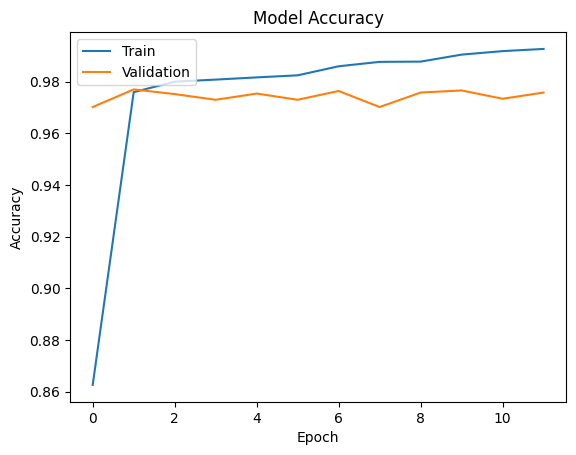

In [ ]:
plt.plot(history3.history['accuracy'])

plt.plot(history3.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

Overfitting is observed in the train and validation curves.

In [ ]:
# Making predictions on the test data
y_pred_test = model3.predict(x_test_normalized)

82/82 [==============================] - 0s 2ms/step


In [ ]:
#Converting the predictions to integers, that can be used to check the model against the correct labels for accuracy.
final_results=[]
for i in y_pred_test:
  np.array(final_results.append(np.round(i,0)))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1300
           1       0.97      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



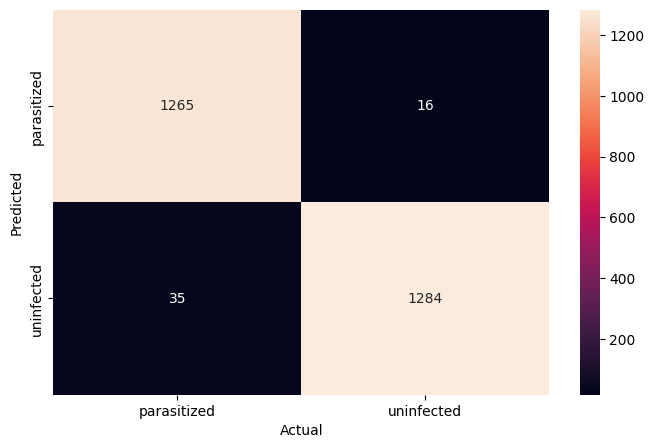

In [ ]:
# Printing the classification report
print(classification_report(y_test_encoded, final_results))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(final_results, y_test_encoded)
CATEGORIES = ["parasitized", "uninfected"]

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = CATEGORIES, yticklabels = CATEGORIES)

plt.ylabel('Predicted')

plt.xlabel('Actual')

# Display the plot
plt.show()

The overall accuracy is similar to other models observed, however the recall for parasitized images is lower than Model 1 and 2.  This model has better performance in terms of precision.  But since this is a deadly disease recall is a more important measure.

<b> Now, let us try to use a pretrained model like VGG16 and check how it performs on our data.

### **Pre-trained model (VGG16)**
- Import VGG16 network upto any layer you choose
- Add Fully Connected Layers on top of it

In [ ]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
import random

np.random.seed(42)

random.seed(42)

tf.random.set_seed(42)

In [ ]:
# Import the Tranfer model from Keras
from keras.applications.vgg16 import VGG16

###<b>Compiling the model

In [ ]:
# Retain the pretrained model parameters and discard the dense neurons.
vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (64,64,3))
vgg_model.summary()

58889256/58889256 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [ ]:
# Making all the layers of the VGG model non-trainable.
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
model4 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model4.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model4.add(Flatten())

# Adding a dense output layer
model4.add(Dense(32, activation='relu'))
model4.add(Dense(32, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))

In [ ]:
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 32)                65568     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 14,781,345
Trainable params: 66,657
Non-trainable params: 14,714,688
_________________________________________________________________


<b> using callbacks

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping  # Regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint

# The following lines of code save the best model parameters if training accuracy goes down on further training
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('best_model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

<b>Fit and Train the model

In [ ]:
history4 = model4.fit(

            x_train_normalized, y_train_encoded,

            epochs = 20,

            validation_split = 0.2,

            shuffle = True,

            verbose = 2,

            callbacks = [es, mc]
)

Epoch 1/20

Epoch 1: val_accuracy improved from -inf to 0.93770, saving model to best_model.h5
624/624 - 15s - loss: 0.2286 - accuracy: 0.9055 - val_loss: 0.1748 - val_accuracy: 0.9377 - 15s/epoch - 24ms/step
Epoch 2/20

Epoch 2: val_accuracy improved from 0.93770 to 0.94191, saving model to best_model.h5
624/624 - 4s - loss: 0.1538 - accuracy: 0.9416 - val_loss: 0.1568 - val_accuracy: 0.9419 - 4s/epoch - 6ms/step
Epoch 3/20

Epoch 3: val_accuracy did not improve from 0.94191
624/624 - 4s - loss: 0.1361 - accuracy: 0.9500 - val_loss: 0.1717 - val_accuracy: 0.9321 - 4s/epoch - 6ms/step
Epoch 4/20

Epoch 4: val_accuracy improved from 0.94191 to 0.94571, saving model to best_model.h5
624/624 - 4s - loss: 0.1308 - accuracy: 0.9518 - val_loss: 0.1419 - val_accuracy: 0.9457 - 4s/epoch - 6ms/step
Epoch 5/20

Epoch 5: val_accuracy did not improve from 0.94571
624/624 - 4s - loss: 0.1285 - accuracy: 0.9517 - val_loss: 0.1698 - val_accuracy: 0.9349 - 4s/epoch - 6ms/step
Epoch 6/20

Epoch 6: val_

<b>Plot the train and validation accuracy

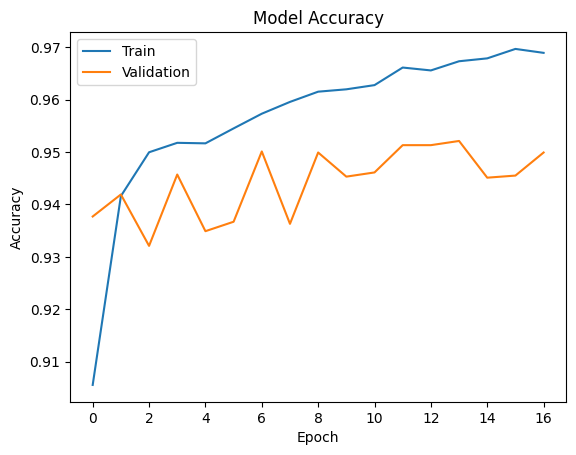

In [ ]:
plt.plot(history4.history['accuracy'])

plt.plot(history4.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

###**Observations and insights: It can be observed that the VGG transfer model is overfitting on the training data.  It is not too suprising that the VGG model is overfitting since it has 14 million parameters.  To increase the generalization of the model it might help to add regularization, dropout, or additional fully connected layers.  Even with the overfitting it did not achieve as high of accuracy on the training data, reaching only 97%._____**

*   What can be observed from the validation and train curves?

###<b> Evaluating the model

In [ ]:
# Making predictions on the test data
y_pred_test = model4.predict(x_test_normalized)

82/82 [==============================] - 1s 6ms/step


In [ ]:
#Converting the predictions to integers, that can be used to check the model against the correct labels for accuracy.
final_results=[]
for i in y_pred_test:
  np.array(final_results.append(np.round(i,0)))

<b>Plotting the classification report and confusion matrix

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1300
           1       0.94      0.97      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



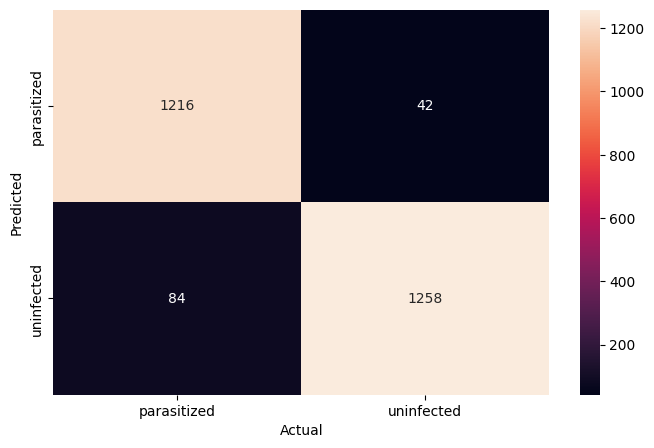

In [ ]:
# Printing the classification report
print(classification_report(y_test_encoded, final_results))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(final_results, y_test_encoded)
CATEGORIES = ["parasitized", "uninfected"]

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = CATEGORIES, yticklabels = CATEGORIES)

plt.ylabel('Predicted')

plt.xlabel('Actual')

# Display the plot
plt.show()

###<b>Think about it:</b>
*  What observations and insights can be drawn from the confusion matrix and classification report?
*  Choose the model with the best accuracy scores from all the above models and save it as a final model.


**It is important to observe all the measures of accuracy from the classification report and confusion matrix. However, recall for parasitized classification is most important for this application, since it is measuring instances of missing patients with potentially lethal Malaria.  In the confusion matrix the important number is the number of images that were actually parasitized but were misclassified as uninfected. Based on these measures the best model was Model 2.**

####<b> Observations and Conclusions drawn from the final model: The final model is Model 2 that had Leaky ReLU as an activation function and without Batch Normalization.  It had the greatest recall at 99% or only 10 instances of misdiagnosing an image with Malria as being uninfected.  It also had good overall accuracy at 98% and did not over diagnose images that were uninfected as being parasitized.  The model had good generalization and did not suffer from overfitting.  Model 2 was a fairly simple model that consisted of 4 CNN layers and 2 dense layers.  The simplicity was beneficial because the input images are rather clean containing a cell that is centered and takes up the majority of the images.  The lighting is fairly well controlled by the microscope.  The uniformity of images reduces the need for complexity and added features in the model._____



**Improvements that can be done:**<br>


*  Can the model performance be improved using other pre-trained models or different CNN architecture?
*  You can try to build a model using these HSV images and compare them with your other models.

I don't believe that large transfer models will be the best solution in this application.  The VGG model was trained to identify a large variety of objects.  The task of cell identification is relatively simple by comparision.  

#### **Insights**

####**Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

**The identification of parasitized cells is mainly driven by an internal feature in the cell, the presence of dark purple dots or lines.  The shape or color of the cell isn't significant.**

####**Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

**The simple CNN with four layers is performing best.  The transfer model based on VGG16 did the worst.  There is room for improvement, the best model still misdiagnosed 10 patients with Malaria.  Some parameters that potentially could be improved are the numbers of neurons in the hidden layers, the size of the filters, the activation function, and the optimizer.  It was observed that Leaky Relu had a positve impact on model performance, it would be good to test other activation functions.  Batch Normalization caused the decreased performance of the initial Model 2.**  

####**Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?

**The best model is Model 2 with Leaky ReLU and without Batch Normalization.  It has the greatest recall and will do the best job at minimizing Malaria deaths.  It also has good overall accuracy and doesn't over diagnose images as being parasitized.**